## Homework Week 2

In [1]:
import numpy as np
import pandas as pd

### Getting the data

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [3]:
!wget $data

--2023-09-26 17:06:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-26 17:06:24 (20.3 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [19]:
df = pd.read_csv('housing.csv')

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
len(df)

20640

### EDA

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

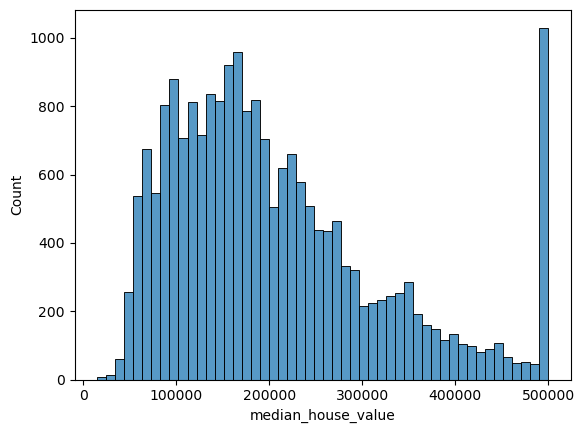

In [8]:
sns.histplot(df.median_house_value, bins=50)

In [22]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
len(df)

15687

In [16]:
selected_columns = ['latitude', 'longitude', 'housing_median_age',
                    'total_rooms', 'total_bedrooms', 'population',
                    'households', 'median_income', 'median_house_value'
                   ]

In [25]:
df = df[selected_columns]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?

In [27]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### total_bedrooms

### Question 2

What's the median (50% percentile) for variable 'population'?

In [28]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

### 50%       1195.000000

## Prepare and split the dataset

In [40]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [48]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [42]:
len(df_val), len(df_test), len(df_train)

(3137, 3137, 9413)

In [43]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [47]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

In [49]:
df.total_bedrooms.describe()

count    15530.000000
mean       541.244688
std        435.650018
min          2.000000
25%        295.000000
50%        432.000000
75%        645.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [52]:
X_train = df_train.values

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [65]:
X_train_zeroes = df_train.fillna(0).values

w0, w = train_linear_regression(X_train_zeroes, y_train)

X_val_zeroes = df_val.fillna(0).values
y_pred = w0 + X_val_zeroes.dot(w)

score_zeroes = rmse(y_val, y_pred)
score_zeroes

0.3408479034182498

In [75]:
mean_bedrooms = df_train['total_bedrooms'].mean()
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(mean_bedrooms)
X_train_mean = df_train.values

w0, w = train_linear_regression(X_train_mean, y_train)

df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(mean_bedrooms)
X_val_mean = df_val.values

y_pred = w0 + X_val_mean.dot(w)

score_mean = rmse(y_val, y_pred)
score_mean

0.34056998014407364

In [76]:
round(score_zeroes, 2), round(score_mean, 2)

(0.34, 0.34)

### Both are equally good

## Question 4

In [82]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) 
    
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train_zeroes = df_train.fillna(0).values

    w0, w = train_linear_regression_reg(X_train_zeroes, y_train, r=r)

    X_val_zeroes = df_val.fillna(0).values
    y_pred = w0 + X_val_zeroes.dot(w)

    score_zeroes = rmse(y_val, y_pred)
    print(r, w0, score_zeroes)

0 -9.886133216346906 0.34056998014407364
1e-06 -9.886112219285174 0.34056998286599954
0.0001 -9.88403396171016 0.34057025254773315
0.001 -9.865180702768187 0.34057272750581835
0.01 -9.68052869555353 0.3405996841242909
0.1 -8.15417116352722 0.34101110710567945
1 -3.16331818126116 0.3446850783582564
5 -0.8483447453373295 0.34757708905676
10 -0.44183186823943826 0.34816142616023005
